# Charge on a plate
Slightly more advanced method of moments where we try to calculate the electrostatic charge on a plate.

## Notes
Still interested in the calculation of the positional information. I am guessing that the X_m, y_m are the integer numbers since the dx is already involved? Perhaps then the charge on a line is meant to be integers. 

In [60]:
import numpy as np
from scipy.sparse.linalg import cg as conjgradsolve
import matplotlib.pyplot as plt

def charge_on_a_plate():
    
    def build_matrix(n,dx,a=0):
        output = []
        #output.append(0)
        j = 0
        diag = (2*a/np.pi)*np.log(1+np.sqrt(2))
        out_matrix = []
        mid = n/2
        for i in range(n+1):
            row = []
            for i in range(n+1):
                if i == j:
                    row.append(diag)
                else:
                    znm = dx/(np.sqrt((j-mid)**2)+(i-mid)**2) #
                    row.append(znm)
            j += 1
            out_matrix.append(row)
            print(row)
            
        out_matrix = np.array(out_matrix)
        return out_matrix
        
        
    bm = 1 #4*np.pi#*8.854e-12 # normalise
    n = 225 
    dx = 1/(n+1)
    
    a_matrix = build_matrix(n,dx)
    b_matrix = [bm for x in a_matrix] # no description of how bm should be formed. Odd that it wouldnt chnage. 
    
    #b_matrix[-1] = 0 # boundary conditions zero field on ends
    #b_matrix[0] = 0 # perhaps these are artificial and the issue is in the matirx
    solution = conjgradsolve(a_matrix,b_matrix, tol=1e-9)
    
    plt.plot(abs(solution[0]*8.854e-12*4*np.pi))
    plt.show()

[0.0, 3.5271956484281843e-07, 3.590739697763849e-07, 3.6560110396909354e-07, 3.723072644407284e-07, 3.791990368344464e-07, 3.862833113827842e-07, 3.9356729990989274e-07, 4.0105855394728847e-07, 4.0876498404692456e-07, 4.166948803825259e-07, 4.2485693473793865e-07, 4.3326026398981147e-07, 4.41914435201313e-07, 4.5082949245390323e-07, 4.6001598555549803e-07, 4.6948500077582397e-07, 4.792481937734637e-07, 4.893178248941912e-07, 4.997067970368387e-07, 5.104286963013061e-07, 5.214978356536076e-07, 5.329293018652792e-07, 5.447390060092883e-07, 5.569437378220771e-07, 5.695612242718516e-07, 5.826101927070604e-07, 5.961104389965912e-07, 6.10082901115018e-07, 6.245497386727756e-07, 6.395344189430095e-07, 6.550618099947366e-07, 6.711582816066053e-07, 6.878518147078538e-07, 7.051721201740224e-07, 7.231507678957216e-07, 7.418213271406088e-07, 7.612195193431589e-07, 7.813833845855718e-07, 8.023534631781942e-07, 8.24172993911422e-07, 8.468881307358145e-07, 8.705481798361019e-07, 8.952058593013903e-07

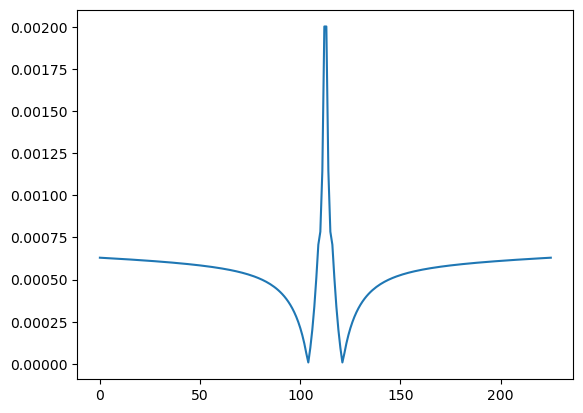

In [62]:
charge_on_a_plate()

Not quite sure why this appears as it does. Looks a little like a point source. 

Attempted to flip the input matrix but this had no effect. Guess that makes sence because the electrical field is constant.  